<a href="https://colab.research.google.com/github/superkisa/MaGaML/blob/main/MathRefresher/least-squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Least Squares: a Linear Algebra Perspective**

Least squares method provides us with an approximate solution $w^*$ to a overdetermined system of linear equations $Xw = y$ that doesn't have exact solutions.

As you already know, coefficients $w$ of the least squares hyperplane can be found as follows:

$w^* = (X^TX)^{-1}X^Ty$, where $X$ is the input features matrix and $y$ is the vector of target values.

Predictions $\hat{y} $ of a linear regression model can be therefore found as $\hat{y} = Xw^* = X(X^TX)^{-1}X^Ty$.

In this notebook, you will implement least squares regression yourself. 

Run the cells one-by-one, adding your code where needed.

In [2]:
import numpy as np

Let's start with a toy dataset we worked with during the practical session:

In [3]:
X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([1, 3, 2])

Define a function that performs least squares regression given the data and returns a vector $w$ containing the coefficients of the least-squares hyperplane (in the toy example -  least squares line).

In [10]:
def least_squares(X, y):
  # Your code here
  return np.linalg.inv(X.T @ X) @ X.T @ y

Let's try it out. Which coefficients does your function return for the toy data above?

In [11]:
w = least_squares(X, y)
print('y = ', w[0], '+ ', w[1], 'x')

y =  0.9999999999999982 +  0.5 x


*Remember that for this example, we have already computed the coefficients  manually. The correct least squares line is $y = 1 + 0.5x$. If you're getting a different result, there is a mistake somewhere.*

And what are the predictions obtained by your model for $X$? 

In [12]:
# Your code here
y_hat = X @ least_squares(X, y)

Let's visualize it! Run the code below to plot the actual data, regression line and model predictions.

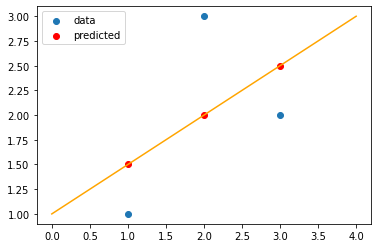

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.plot()
plt.scatter(X[:,1], y, label='data')

xx = np.linspace(0,4,100)
yy = w[0] +w[1]*xx
plt.plot(xx, yy, color='orange')

plt.scatter(X[:,1], y_hat, color='red', label='predicted')

plt.legend()

## **Working with real data**

Now, let's try to fit a similar model on more interesting data.

We will be working with the [diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

The dataset contains ten baseline measurements (age, sex, body mass index, average blood pressure, and six blood serum measurements), as well as a quantitative measure of diabetes progression for over 400 patients.

First, we need to load the data. It's already included in the 
$\texttt{datasets}$ module of the $\texttt{sklearn}$ library:

In [39]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

We can check the size of the dataset...

In [40]:
X.shape

(442, 10)

In [41]:
y.shape

(442,)

... and take a look at the data:

In [42]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [43]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

Now, let's try to fit a least-squares hyperplane through the data so that we can predict diabetes progression based on the results of the ten baseline measurements.  

(!!!) Before applying your function to the data, don't forget to insert the auxilary columns filled with $1$s into the data matrix $X$.

Hint: [np.insert()](https://numpy.org/doc/stable/reference/generated/numpy.insert.html) might be helpful.

In [44]:
# Your code here
X = np.insert(X, 0, 1, axis=1)

Now, let's estimate the model's coefficients:

In [45]:
# Your code here
w = least_squares(X, y)

Let's evaluate how much do model predictions $\hat{y}$ differ from the original values $y$. Compute the so-called **Mean Squared Error ** (MSE), which is the average squared error of the prediction:

$MSE = \frac{1}{n} \sum_{i=1}^n {(y_i - \hat{y})_i^2}$.

In [46]:
# Your code here
y_hat = X @ w
mse = np.sum((y - y_hat)**2) / y.shape[0]
print(mse)

2859.6903987680657
